   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.

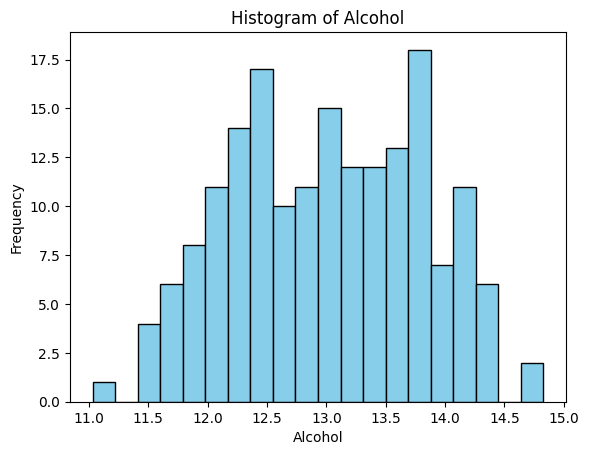

21.866666666666667 20.0
{'Count': 15, 'Mean': np.float64(21.866666666666667), 'Min': np.int64(3), 'Max': np.int64(50), 'Std Dev': np.float64(12.483945245349679)}
[[ 6 34 20  3 39 30]
 [ 2 31 47  4 27 23]
 [36 11 10  1 24 18]
 [14 10 38  9  1  1]
 [43 41 18 49  3  7]
 [50 12  9 14 18  6]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocya

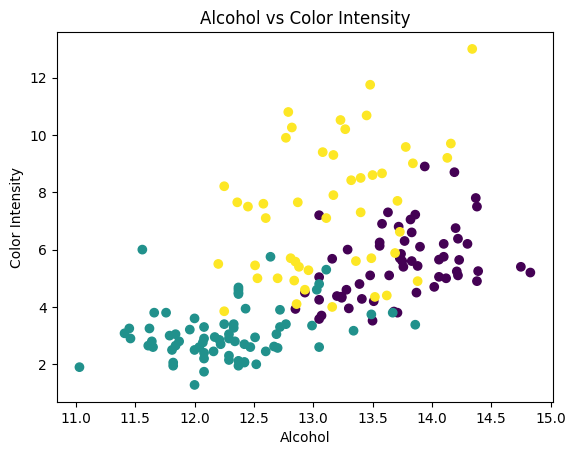

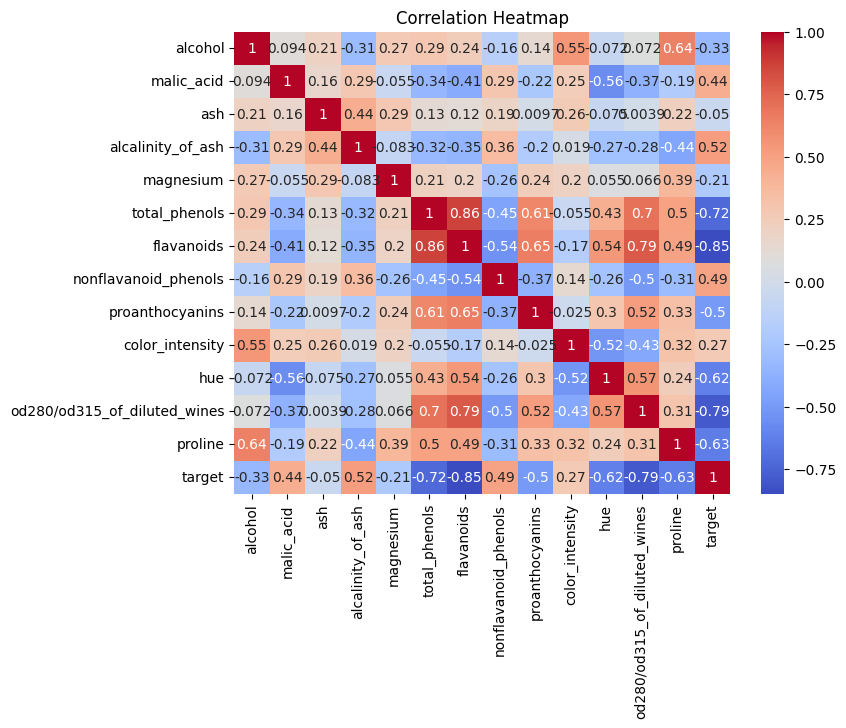

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df.head(7))

def dataset_shape(dataframe):
    return dataframe.shape

print(dataset_shape(df))

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(train_df.shape, test_df.shape)

desc_stats = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Variance': df.var(numeric_only=True),
    'Std Dev': df.std(numeric_only=True)
})
print(desc_stats)

plt.hist(df['alcohol'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

numbers = [3, 7, 10, 15, 20, 25, 30, 12, 14, 18, 22, 27, 35, 40, 50]
print(np.mean(numbers), np.median(numbers))

def list_summary(values):
    return {
        'Count': len(values),
        'Mean': np.mean(values),
        'Min': np.min(values),
        'Max': np.max(values),
        'Std Dev': np.std(values)
    }

print(list_summary(numbers))

matrix = np.random.randint(1, 51, size=(6,6))
print(matrix)

df.to_csv("wine_data.csv", index=False)
df_csv = pd.read_csv("wine_data.csv")
print(df_csv.info())
print(df_csv.describe())

X = df[['alcohol', 'malic_acid', 'ash']]
y = df['color_intensity']
model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['alcohol']])
print(scaled_values[:10].flatten())

grouped = df.groupby('target')['alcohol'].mean()
print(grouped)

plt.scatter(df['alcohol'], df['color_intensity'], c=df['target'], cmap='viridis')
plt.title("Alcohol vs Color Intensity")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

df_cleaned = df.fillna(df.mean(numeric_only=True))
df_cleaned.to_csv("wine_cleaned.csv", index=False)
